In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import models, transforms
from torchvision.datasets import ImageFolder
from torchvision.models import resnet18
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [2]:
def get_subdirectories(directory):
    subdirectories = [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))]
    return subdirectories

In [14]:
def classification_model(training_path):
    
    # Define data transformations
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
    ])

    # Load the dataset
    train_dataset = ImageFolder(root=training_path, transform=transform)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)

    # Load a pre-trained ResNet18 model with specified weights
    model = resnet18(pretrained=False)  # Set pretrained to False
    model.load_state_dict(torch.hub.load_state_dict_from_url(
        "https://download.pytorch.org/models/resnet18-f37072fd.pth", progress=True))
    # Modify the output layer to match the number of monuments (assuming 18 classes)
    model.fc = nn.Linear(model.fc.in_features, 15)

    # Set the model to device
    model = model.to(device)

    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Training loop
    num_epochs = 10
    for epoch in range(num_epochs):
        model.train()
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item()}")

    # Save the trained model
    torch.save(model.state_dict(), "monument_cl.pth")


In [18]:
def prediction_(monuments,testing_path):
    # Load the trained model
    model = models.resnet18(pretrained=False)
    model.fc = nn.Linear(model.fc.in_features, 15)
    model.load_state_dict(torch.load("monument_cl.pth", map_location=device))
    model.eval()

    # Define image transformation for inference
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
    ])
    # Load and preprocess the input image
    for i in monuments:
        try:
            image_path = testing_path + f"/{i}/Image_7.jpg"  # Replace with the path to your test image
            input_image = Image.open(image_path).convert("RGB")
        except FileNotFoundError:
            image_path = testing_path + f"/{i}/Image_7.jpeg"  # Replace with the path to your test image
            input_image = Image.open(image_path).convert("RGB")

        input_tensor = transform(input_image).unsqueeze(0).to(device)
        # Perform inference
        with torch.no_grad():
            output = model(input_tensor)
            _, predicted_class = torch.max(output, 1)
        # Print the predicted class
        plt.figure(figsize=(5,5))
        plt.imshow(input_image)
        plt.show()
        print(f"Predicted class for {i}: {predicted_class.item()}")

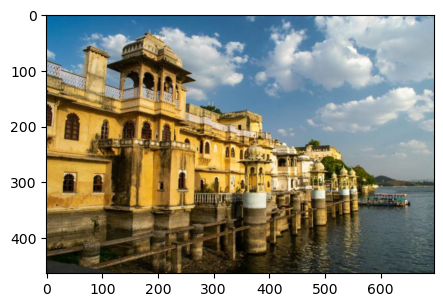

Predicted class for Bagore Ki Haveli: 6


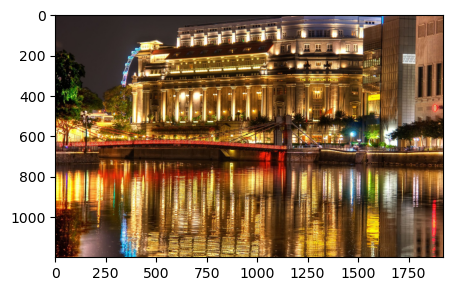

Predicted class for City Palace: 12


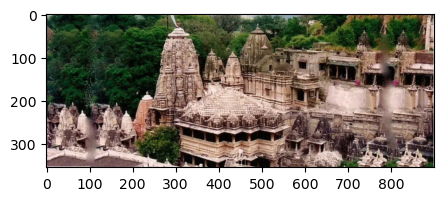

Predicted class for Eklingji Temple: 10


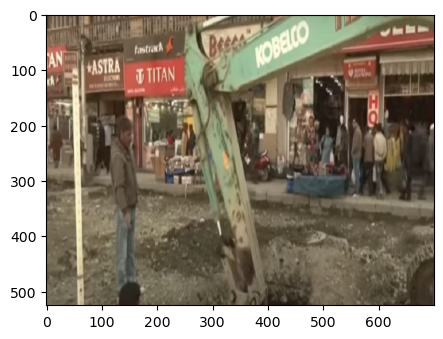

Predicted class for Ghanta Ghar: 6


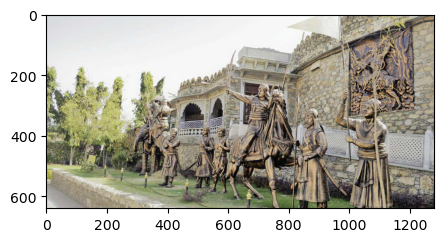

Predicted class for Haldighati: 14


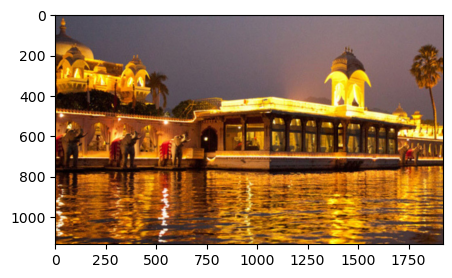

Predicted class for Jag Mandir Palace: 6


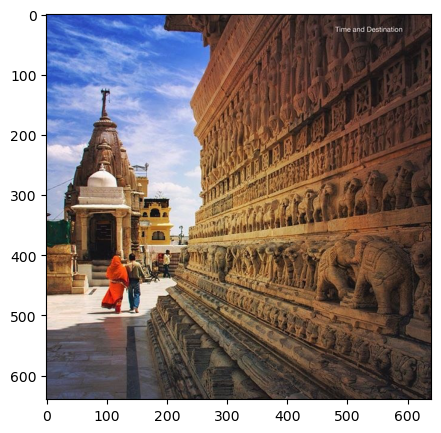

Predicted class for Jagdish Temple: 14


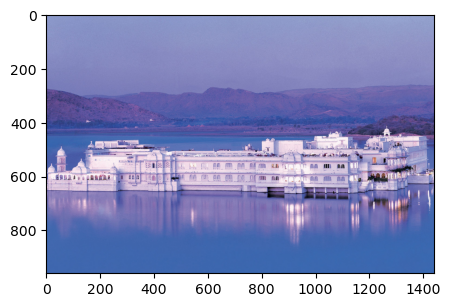

Predicted class for Lake Palace: 4


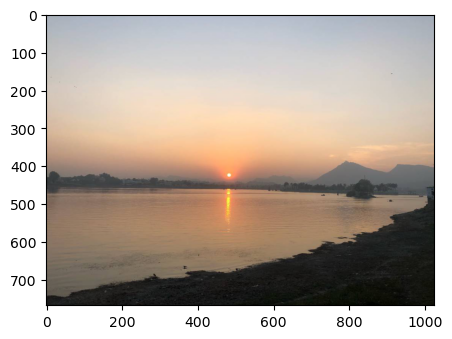

Predicted class for Moti Magri: 12


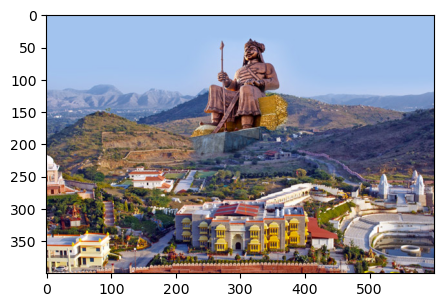

Predicted class for Pratap Gaurav Kendra: 7


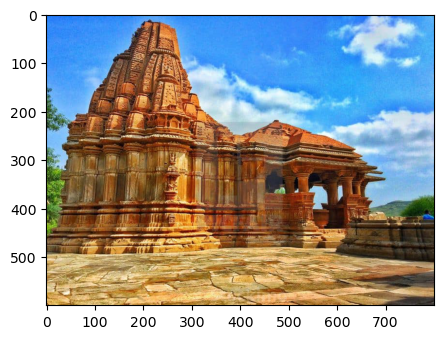

Predicted class for Saas Bahu Temple: 7


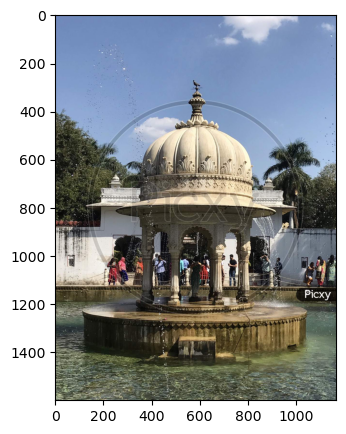

Predicted class for Saheliyon Ki Bari: 4


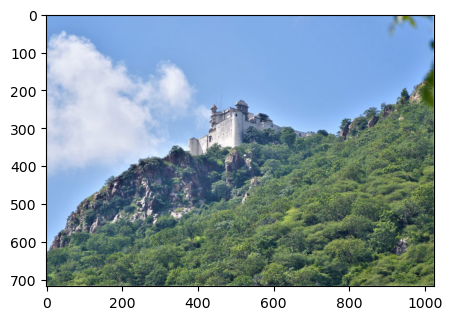

Predicted class for Sajjangarh Palace: 5


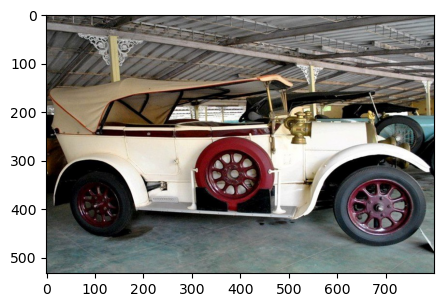

Predicted class for Vintage and Classic Car Museum: 6


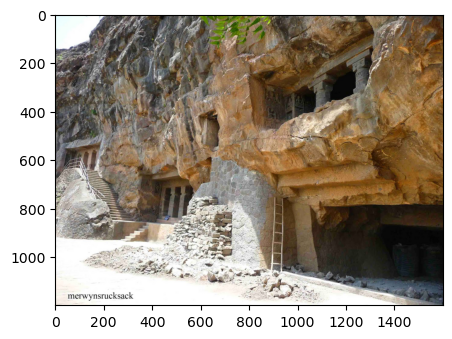

Predicted class for Aurangabad Caves: 14


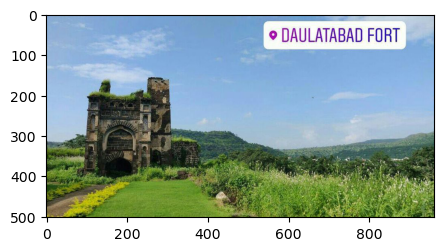

Predicted class for Bani Begum Garden: 2


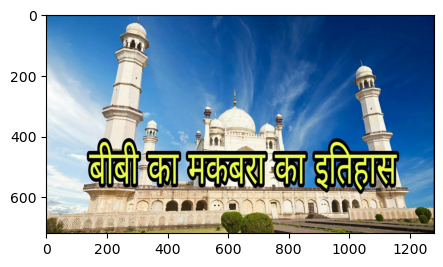

Predicted class for Bibi-ka-Maqbara: 9


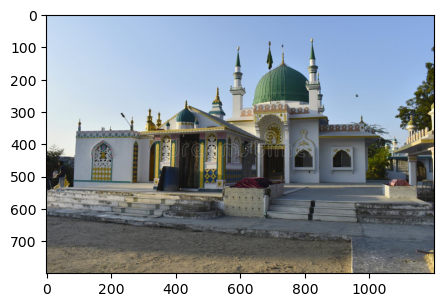

Predicted class for Dargah of Pir Ismail: 4


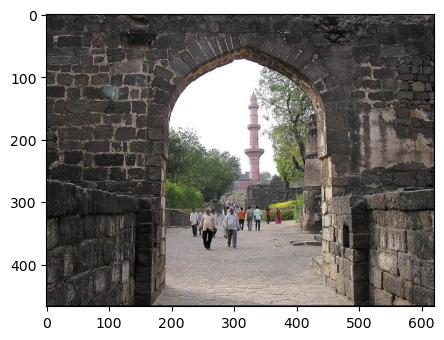

Predicted class for Daulatabad Fort: 5


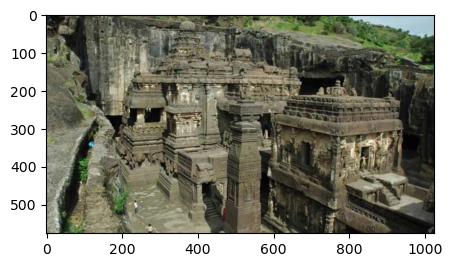

Predicted class for Ellora Caves: 6


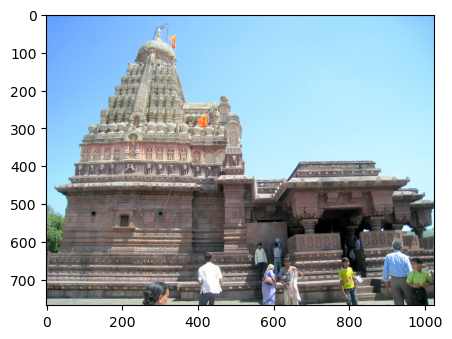

Predicted class for Ghrishneshwar Temple: 7


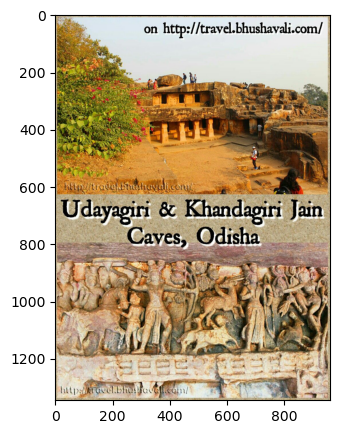

Predicted class for Jain Caves: 8


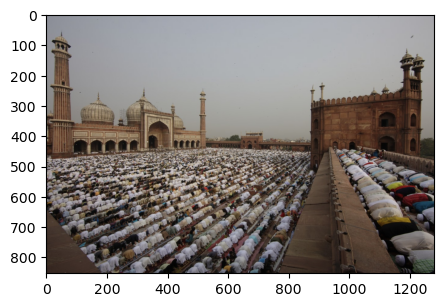

Predicted class for Jama Masjid: 9


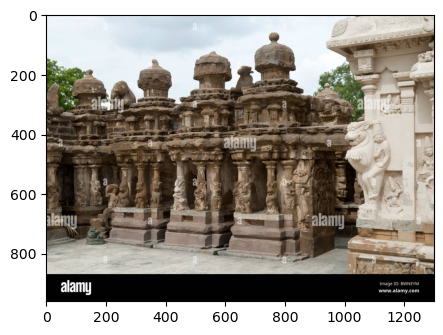

Predicted class for Kailasanatha: 10


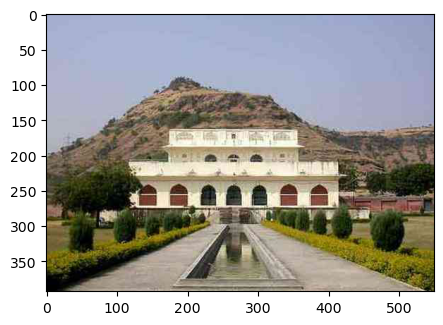

Predicted class for Killa Arak: 11


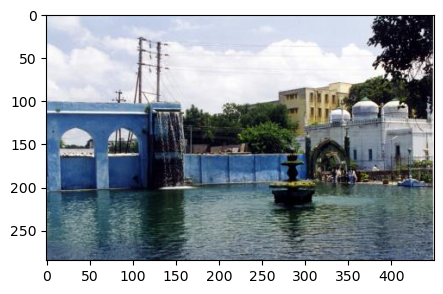

Predicted class for Panchakki: 12


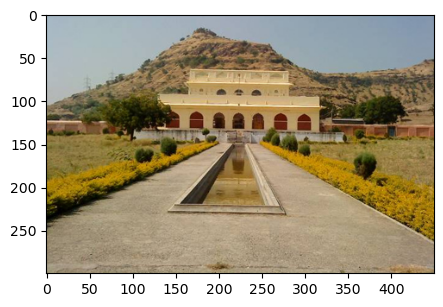

Predicted class for Sunheri Mahal: 13


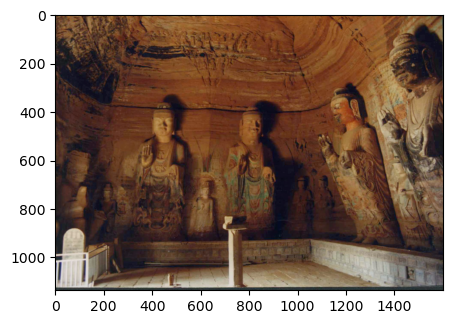

Predicted class for The Buddist Caves: 14


In [19]:
cities=["mumbai","jodhpur","delhi","jaipur","udaipur","aurangabad"]
# Set device (use GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
for i in cities:
    dir_path=f"monuments/{i}/training"
    testing_path=f"monuments/{i}/testing"
    subdir_list=get_subdirectories(dir_path)
    monuments=[]
    for j in subdir_list[1:]:
        monuments.append(j)
    classes=len(monuments)
    #classification_model(dir_path)
    prediction_(monuments,testing_path)

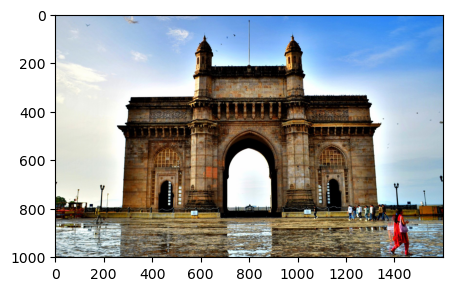

Predicted class: Gateway of India


In [26]:
from torchvision import models, transforms
from PIL import Image
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
# Load the trained model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.resnet18(pretrained=False)
model.fc = nn.Linear(model.fc.in_features, 18)
model.load_state_dict(torch.load("monument_classifier.pth", map_location=device))
model.eval()

# Define image transformation for inference
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Load and preprocess the input image

image_path = "mumbai/Image.jpg"  # Replace with the path to your test image
input_image = Image.open(image_path).convert("RGB")
input_tensor = transform(input_image).unsqueeze(0).to(device)
# Perform inference
with torch.no_grad():
    output = model(input_tensor)
    _, predicted_class = torch.max(output, 1)
# Print the predicted class
plt.figure(figsize=(5,5))
plt.imshow(input_image)
plt.show()
predicted_class_name = l1[predicted_class.item()]
print(f"Predicted class: {predicted_class_name}")